(dft-linearity)=
# Linearity

In [2]:
%run ../setup.ipynb

The first major property of the DFT that we'll cover is **linearity**.
We've already seen linearity in the context of {ref}`LSI systems <linearity>`, where we used it do understand what happens when you convolve a filter $h$ with a mixture of signals.

Here, we'll use linearity slightly differently, but the basic idea is the same.

````{admonition} Theorem: DFT Linearity

For any pair of signals $\blue{x_1[n]}$ and $\blue{x_2[n]}$ of the same length, and real numbers ${\red{c_1, c_2}}$, the following holds:

```{math}
\text{DFT}(\red{c_1} \cdot \blue{x_1} + \red{c_2} \cdot \blue{x_2}) = 
\red{c_1} \cdot \text{DFT}(\blue{x_1}) + \red{c_2} \cdot \text{DFT}(\blue{x_2}).
```
````

We'll prove this property algebraically, starting from the definition of the DFT {eq}`dft-polar`:

```{math}
\darkblue{X[m]} = \sum_{n=0}^{N-1} \blue{x[n]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n\right)}
```

Let $0 \leq m < N$ be any frequency index.
Using $x=\red{c_1} \cdot \blue{x_1} + \red{c_2} \cdot \blue{x_2}$ as our input signal, its $m$th DFT component is


\begin{align*}
\sum_{n=0}^{N-1} \left(\red{c_1} \cdot \blue{x_1[n]} + \red{c_2} \cdot \blue{x_2[n]}\right) \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n\right)}
&= 
\sum_{n=0}^{N-1} \left(\red{c_1} \cdot \blue{x_1[n]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n\right)} \right.\\
&\;\;\left.+ \red{c_2} \cdot \blue{x_2[n]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n\right)}\vphantom{\frac{m}{n}}\right)\\
&=
\red{c_1} \cdot \sum_{n=0}^{N-1}  \blue{x_1[n]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n\right)} \\
&\;\;+ \red{c_2} \cdot \sum_{n=0}^{N-1} \blue{x_2[n]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n\right)}\\
&= \red{c_1} \cdot \darkblue{X_1[m]} + \red{c_1} \cdot \darkblue{X_2[m]}.
\end{align*}

So if we scale and mix two input signals, the resulting DFT component is the same scaling and mixing of their individual DFT components $\darkblue{X_1[m]}$ and $\darkblue{X_2[m]}$.
Since this holds for any $m$ it must hold for all $m$, so the entire DFT sequence of the mixture is the mixture of the DFT sequences.
This is what we set out to prove.

***What does linearity buy us?***

DFT linearity is important because most interesting signals are *not* just simple sinusoids.
What DFT linearity says is that if we can represent an arbitrary signal $x$ as a weighted combination of sinusoids, then we can reason about its DFT in terms of its constituent sinusoids.

As we will see in the next chapter (and as we've hinted at earlier), it turns out that *all* signals can be represented as a weighted combination of sinusoids.

## Magnitude is not linear

Note that DFT linearity applies to the **complex numbers** $\darkblue{X[m]}$ which encode both magnitude and phase.
There is nothing wrong with adding complex numbers: it's a fine and wholesome pastime!

However, it is a common mistake to add **magnitudes** rather than the full complex numbers.

````{admonition} Magnitude is not linear!
:class: warning

If signals $\blue{x_1[n]}$ and $\blue{x_2[n]}$ have DFT series $\darkblue{X_1[m]}$ and $\darkblue{X_2[m]}$, then the sum $\purple{y[n]} = \blue{x_1[n] + x_2[n]}$ has DFT series $\darkblue{Y[m] = X_1[m] + X_2[m]}$.

But remember,
\begin{align*}
\left|\darkblue{Y[m]}\right| &= \left|\darkblue{X_1[m] + X_2[m]}\right|\\
&\neq \left|\darkblue{X_1[m]}\right| + \left|\darkblue{X_2[m]}\right|.
\end{align*}
````

### Example

For an extreme case, consider $\purple{x_2[n]} = -\blue{x_1[n]}$ for some arbitrary, non-empty signal $\blue{x_1}$.
DFT linearity says that $\darkblue{X_2[m] = -1 \cdot X_1[m]}$, so the spectra $\darkblue{X_1}$ and $\darkblue{X_2}$ are opposites.
However, the spectral *magnitudes* are identical:
```{math}
\darkblue{X_2[m] = -X_1[m]} \quad \Rightarrow \quad \darkblue{|X_2[m]| = |-1 \cdot X_1[m]| = |X_1[m]|}.
```
If we were to add the magnitude spectra, we'd get
```{math}
|\darkblue{X_1[m]}| + |\darkblue{X_2[m]}| = |\darkblue{X_1[m]}| + |\darkblue{X_1[m]}| = 2\cdot |\darkblue{X_1[m]}|.
```
However, if we mix the two signals in the time domain, we get the empty signal:
```{math}
y[n] = \blue{x_1[n]} + \purple{x_2[n]} = \blue{x_1[n] - x_1[n]} = 0.
```
The empty signal has an empty spectrum: $\darkblue{Y[m] = 0}$ for all $m$, but 
```{math}
|\darkblue{Y[m]}| = 0 \neq 2 \cdot |\darkblue{X_1[m]}|
```
in general.

What this says is that **mixing signals** does not equate to **mixing DFT magnitudes**.

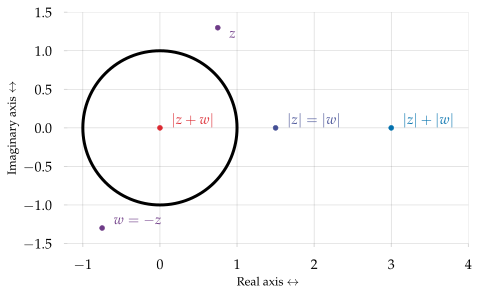

In [3]:
fig, ax = plt.subplots(figsize=figaspect(0.5))

z = 1.5 * np.exp(1.j * np.pi / 3)

ax.scatter([z.real], [z.imag], color=colors[4])
ax.text(z.real + 0.15, z.imag, r'$z$', va='top', color=colors[4])
ax.scatter([-z.real], [-z.imag], color=colors[4])
ax.text(-z.real + 0.15, -z.imag, r'$w = -z$', va='bottom', color=colors[4])
ax.scatter([np.abs(z)], 0, color=colors[11])
ax.text(np.abs(z) + 0.15, 0, r'$|z| = |w|$', va='bottom', color=colors[11])

ax.scatter([2 * np.abs(z)], 0, color=colors[0])
ax.text(2 * np.abs(z) + 0.15, 0, r'$|z| + |w|$', va='bottom', color=colors[0])

ax.scatter([0], [0], color=colors[1])
ax.text(0.15, 0, r'$|z+w|$', va='bottom', color=colors[1])

circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=3, fill=False, zorder=-1)
ax.add_artist(circ)

ax.set(aspect=1, xlim=[-1.2, 4], ylim=[-1.5, 1.5])
ax.set_xlabel(r'Real axis $\leftrightarrow$')
ax.set_ylabel(r'Imaginary axis  $\leftrightarrow$');
glue('mag-sum', fig, display=False)

```{glue:figure} mag-sum

Complex numbers $\purple{z}$ and $\purple{w=-z}$ have the same magnitude $\darkblue{|z| = |w|}$ but different phase.
The sum of their magnitudes $\blue{|z| + |w|}$ is not the same as the magnitude of their sum $\red{|z + w| = 0}$.
```